# Post-operative Recovery

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

## Acquire

In [2]:
df = pd.read_csv('post-operative.data')

Data Source: http://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient

The classification task of this database is to determine where patients in a postoperative recovery area should be sent to next. Because hypothermia is a significant concern after surgery (Woolery, L. et. al. 1991), the attributes correspond roughly to body temperature measurements. 

Attribute Information:

1. L-CORE (patient's internal temperature in C): 
high (> 37), mid (>= 36 and <= 37), low (< 36) 
2. L-SURF (patient's surface temperature in C): 
high (> 36.5), mid (>= 36.5 and <= 35), low (< 35) 
3. L-O2 (oxygen saturation in %): 
excellent (>= 98), good (>= 90 and < 98), 
fair (>= 80 and < 90), poor (< 80) 
4. L-BP (last measurement of blood pressure): 
high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70) 
5. SURF-STBL (stability of patient's surface temperature): 
stable, mod-stable, unstable 
6. CORE-STBL (stability of patient's core temperature) 
stable, mod-stable, unstable 
7. BP-STBL (stability of patient's blood pressure) 
stable, mod-stable, unstable 
8. COMFORT (patient's perceived comfort at discharge, measured as 
an integer between 0 and 20) 
9. decision ADM-DECS (discharge decision): 
I (patient sent to Intensive Care Unit), 
S (patient prepared to go home), 
A (patient sent to general hospital floor)

In [3]:
#trying out pandas profiling for the first time
profile = pandas_profiling.ProfileReport(df)

In [4]:
profile

Number of variables,9
Number of observations,89
Total Missing (%),0.0%
Total size in memory,6.3 KiB
Average record size in memory,72.9 B
Numeric,0
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
df.head()

,mid,low,excellent,mid.1,stable,stable.1,stable.2,15,A
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S


## Prepare

Renaming columns to make it easier to understand

In [6]:
df = df.rename(index=str, columns={'mid': "int_temp", "low": "surface_temp", 'excellent':'oxygen', 'mid.1':'last_bp', 'stable':'surf_stable', 'stable.1':'core_stable', 'stable.2':'bp_stable', '15':'comfort', 'A':'decision'})

In [7]:
df.head()

,int_temp,surface_temp,oxygen,last_bp,surf_stable,core_stable,bp_stable,comfort,decision
0,mid,high,excellent,high,stable,stable,stable,10,S
1,high,low,excellent,high,stable,stable,mod-stable,10,A
2,mid,low,good,high,stable,unstable,mod-stable,15,A
3,mid,mid,excellent,high,stable,stable,stable,10,A
4,high,low,good,mid,stable,stable,unstable,15,S


Encoding categorical values to make them model-compatible

In [8]:
def encode_data(df):
    for col in df.drop(columns=(['comfort'])):
        encoder = LabelEncoder()
        encoder.fit(df[col])
        new_col = col + '_encode'
        df[new_col] = encoder.transform(df[col])
    return df

In [9]:
df = encode_data(df)

In [10]:
df.head()

,int_temp,surface_temp,oxygen,last_bp,surf_stable,core_stable,bp_stable,comfort,decision,int_temp_encode,surface_temp_encode,oxygen_encode,last_bp_encode,surf_stable_encode,core_stable_encode,bp_stable_encode,decision_encode
0,mid,high,excellent,high,stable,stable,stable,10,S,2,0,0,0,0,1,1,3
1,high,low,excellent,high,stable,stable,mod-stable,10,A,0,1,0,0,0,1,0,0
2,mid,low,good,high,stable,unstable,mod-stable,15,A,2,1,1,0,0,2,0,1
3,mid,mid,excellent,high,stable,stable,stable,10,A,2,2,0,0,0,1,1,0
4,high,low,good,mid,stable,stable,unstable,15,S,0,1,1,2,0,1,2,3


## Explore

In [13]:
int_care = df[df.decision == 'I']

In [14]:
home = df[df.decision == 'S']

In [15]:
general = df[df.decision == 'A']

How many patients per type of decision

In [60]:
print(int_care.decision.count(), 'patients were sent to the intensive care unit')
print(home.decision.count(), 'patients were sent home')
print(general.decision.count(), 'patients were sent to the general hospital floor')

2 patients were sent to the intensive care unit
24 patients were sent home
62 patients were sent to the general hospital floor


In [21]:
int_care

,int_temp,surface_temp,oxygen,last_bp,surf_stable,core_stable,bp_stable,comfort,decision,int_temp_encode,surface_temp_encode,oxygen_encode,last_bp_encode,surf_stable_encode,core_stable_encode,bp_stable_encode,decision_encode
45,low,mid,good,high,unstable,stable,stable,?,I,1,2,1,0,1,1,1,2
81,mid,low,good,mid,stable,stable,unstable,10,I,2,1,1,2,0,1,2,2


In [52]:
home.head()

,int_temp,surface_temp,oxygen,last_bp,surf_stable,core_stable,bp_stable,comfort,decision,int_temp_encode,surface_temp_encode,oxygen_encode,last_bp_encode,surf_stable_encode,core_stable_encode,bp_stable_encode,decision_encode
0,mid,high,excellent,high,stable,stable,stable,10,S,2,0,0,0,0,1,1,3
4,high,low,good,mid,stable,stable,unstable,15,S,0,1,1,2,0,1,2,3
5,mid,low,excellent,high,stable,stable,mod-stable,05,S,2,1,0,0,0,1,0,3
6,high,mid,excellent,mid,unstable,unstable,stable,10,S,0,2,0,2,1,2,1,3
7,mid,high,good,mid,stable,stable,stable,10,S,2,0,1,2,0,1,1,3


In [51]:
general.head()

,int_temp,surface_temp,oxygen,last_bp,surf_stable,core_stable,bp_stable,comfort,decision,int_temp_encode,surface_temp_encode,oxygen_encode,last_bp_encode,surf_stable_encode,core_stable_encode,bp_stable_encode,decision_encode
1,high,low,excellent,high,stable,stable,mod-stable,10,A,0,1,0,0,0,1,0,0
3,mid,mid,excellent,high,stable,stable,stable,10,A,2,2,0,0,0,1,1,0
9,mid,mid,good,mid,stable,stable,stable,15,A,2,2,1,2,0,1,1,0
10,mid,low,good,high,stable,stable,mod-stable,10,A,2,1,1,0,0,1,0,0
11,high,high,excellent,high,unstable,stable,unstable,15,A,0,0,0,0,1,1,2,0


looking at value counts for each type to see if a feature stands out as a deciding factor

In [62]:
for c in general[['int_temp', 'surface_temp', 'oxygen', 'last_bp', 'surf_stable', 'core_stable', 'bp_stable']]:
    print ("---- %s ---" % c)
    print (general[c].value_counts())

---- int_temp ---
mid     40
low     12
high    10
Name: int_temp, dtype: int64
---- surface_temp ---
mid     33
low     15
high    14
Name: surface_temp, dtype: int64
---- oxygen ---
good         31
excellent    31
Name: oxygen, dtype: int64
---- last_bp ---
mid     37
high    22
low      3
Name: last_bp, dtype: int64
---- surf_stable ---
unstable    32
stable      30
Name: surf_stable, dtype: int64
---- core_stable ---
stable        59
unstable       2
mod-stable     1
Name: core_stable, dtype: int64
---- bp_stable ---
stable        29
unstable      17
mod-stable    16
Name: bp_stable, dtype: int64


In [63]:
for c in home[['int_temp', 'surface_temp', 'oxygen', 'last_bp', 'surf_stable', 'core_stable', 'bp_stable']]:
    print ("---- %s ---" % c)
    print (home[c].value_counts())

---- int_temp ---
mid     15
low      6
high     3
Name: int_temp, dtype: int64
---- surface_temp ---
mid     14
low      7
high     3
Name: surface_temp, dtype: int64
---- oxygen ---
good         13
excellent    11
Name: oxygen, dtype: int64
---- last_bp ---
mid     18
high     6
Name: last_bp, dtype: int64
---- surf_stable ---
unstable    12
stable      12
Name: surf_stable, dtype: int64
---- core_stable ---
stable      21
unstable     3
Name: core_stable, dtype: int64
---- bp_stable ---
stable        15
unstable       5
mod-stable     4
Name: bp_stable, dtype: int64


In [64]:
for c in int_care[['int_temp', 'surface_temp', 'oxygen', 'last_bp', 'surf_stable', 'core_stable', 'bp_stable']]:
    print ("---- %s ---" % c)
    print (int_care[c].value_counts())

---- int_temp ---
mid    1
low    1
Name: int_temp, dtype: int64
---- surface_temp ---
mid    1
low    1
Name: surface_temp, dtype: int64
---- oxygen ---
good    2
Name: oxygen, dtype: int64
---- last_bp ---
mid     1
high    1
Name: last_bp, dtype: int64
---- surf_stable ---
stable      1
unstable    1
Name: surf_stable, dtype: int64
---- core_stable ---
stable    2
Name: core_stable, dtype: int64
---- bp_stable ---
unstable    1
stable      1
Name: bp_stable, dtype: int64


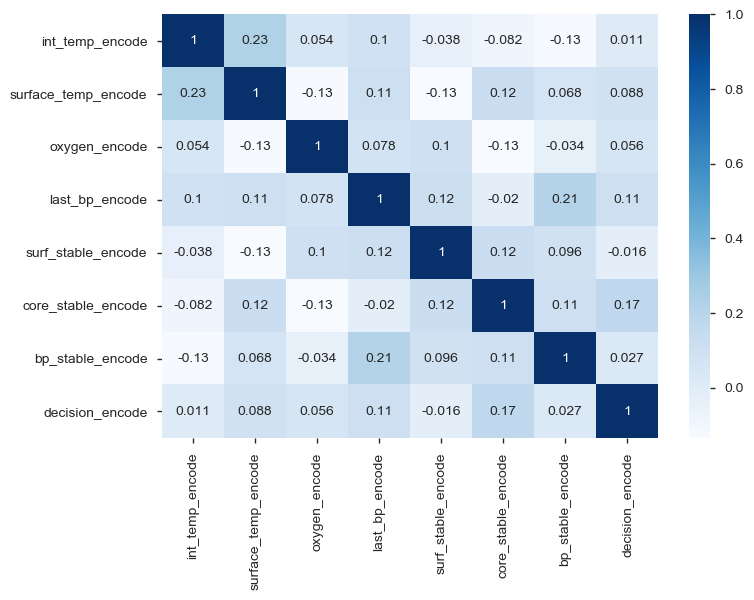

In [71]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

last_bp and core_stable have the highest correlation with the overall decision, so they will be used first in the model

## Model